In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [45]:
P = [27.1833 * 0.224954, 0]
P[1] = P[0] * np.sqrt((0.1 / 27.1833)**2 + (0.01 / 0.224954)**2)

room_temp_table = pd.read_csv("data/record1.csv").to_numpy()

T_room = room_temp_table[:, 1]

T_room = [i + 273 for i in T_room]

cal_temp_table = pd.read_csv("data/record2.csv").to_numpy()

# Установка номер 2
T_cal = [14.377980252039598845 * i + 39.35514018691588785 for i in cal_temp_table[:, 1]]

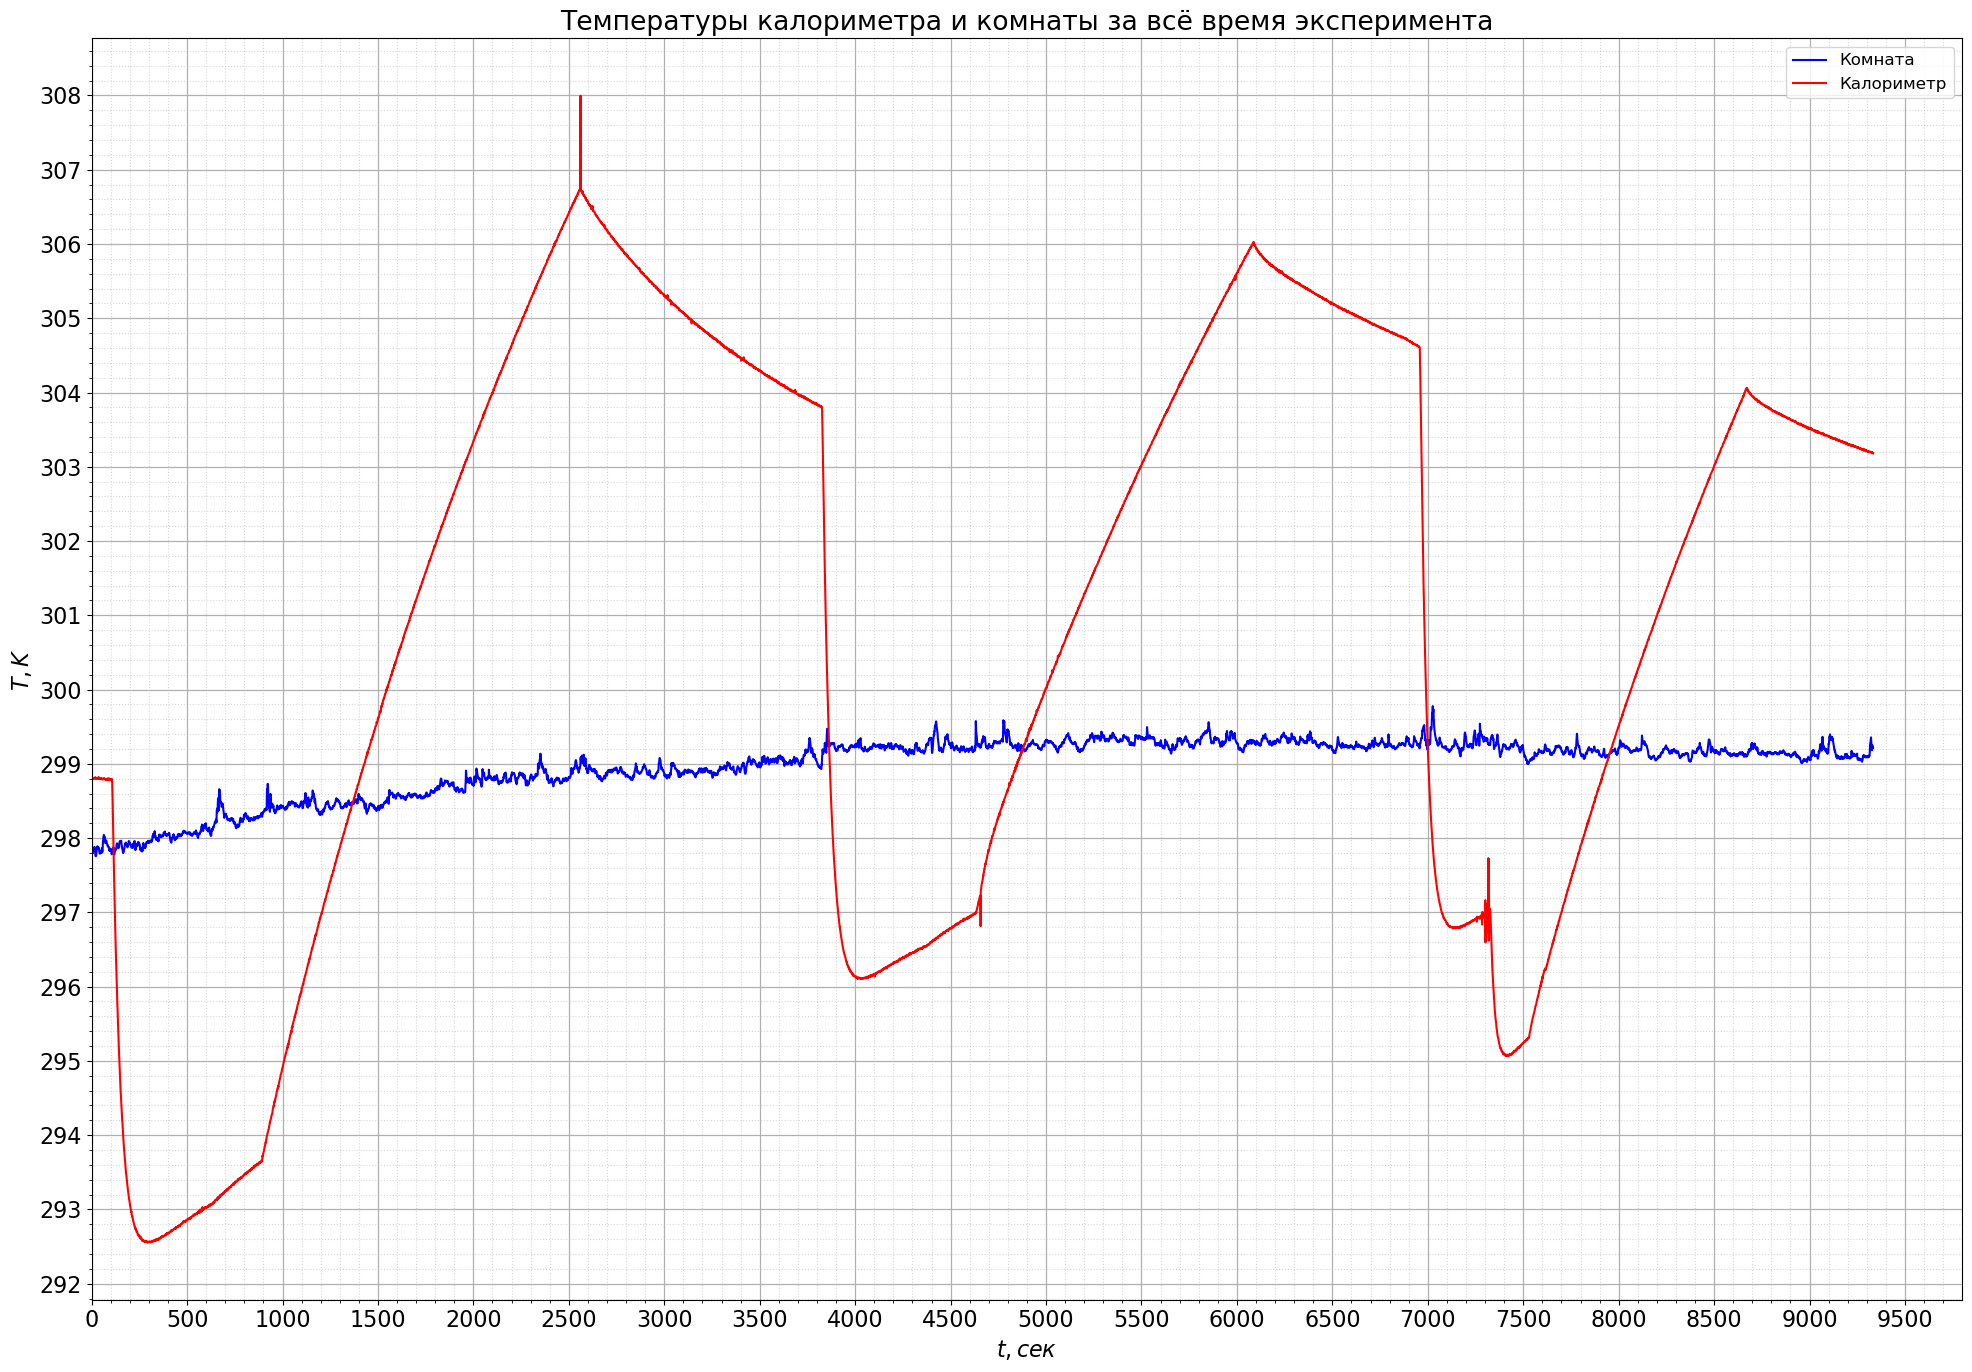

In [46]:
mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
plt.figure(figsize = (20,14), facecolor = "white") # Создаем фигуру

# Подписываем оси и график
plt.title("Температуры калориметра и комнаты за всё время эксперимента")
plt.ylabel(r"$T, K$")
plt.xlabel(r"$t, сек$")

plt.plot([i for i in range(0, len(T_room))], T_room, "b", label = "Комната")
plt.plot([i for i in range(0, len(T_room))], T_cal, "r", label = "Калориметр")

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.xticks(range(0, 9501, 500))
plt.yticks(range(292, 309, 1))
plt.xlim(xmin = 0)
plt.minorticks_on()
plt.tight_layout()
plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

plt.savefig("img/graph_all.png")
plt.show()

In [47]:
timetable = [["Событие", "Начало, сек", "Конец, сек"],
             ["$T_{heat_1}(t)$ - нагрев пустого калориметра", "1000", "2500"],
             ["$T_{cool_1}(t)$ - охлаждение пустого калориметра", "2600", "3700"],
             ["$T_{heat_2}(t)$ - нагрев алюминия", "4800", "6000"],
             ["$T_{cool_2}(t)$ - охлаждение алюминия", "6300", "6900"],
             ["$T_{heat_3}(t)$ - нагрев титана", "7800", "8600"],
             ["$T_{cool_3}(t)$ - охлаждение титана", "8800", "9300"]]

texTable(timetable)

t_heat_1 = [1000, 2500]
t_cool_1 = [2600, 3700]
t_heat_2 = [4800, 6000]
t_cool_2 = [6300, 6900]
t_heat_3 = [7800, 8600]
t_cool_3 = [8800, 9300]



\begin{table}[!ht]
    \centering
    \begin{tabular}{|c|c|c|}
        \hline

        Событие & Начало, сек & Конец, сек\\ \hline
        $T_{heat_1}(t)$ - нагрев пустого калориметра & 1000 & 2500\\ \hline
        $T_{cool_1}(t)$ - охлаждение пустого калориметра & 2600 & 3700\\ \hline
        $T_{heat_2}(t)$ - нагрев алюминия & 4800 & 6000\\ \hline
        $T_{cool_2}(t)$ - охлаждение алюминия & 6300 & 6900\\ \hline
        $T_{heat_3}(t)$ - нагрев титана & 7800 & 8600\\ \hline
        $T_{cool_3}(t)$ - охлаждение титана & 8800 & 9300\\ \hline

    \end{tabular}
    \caption{}
    \label{}
\end{table}



In [48]:
def make_cool_mnk(x, y, title, mnk_beginning, file):

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (8,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(title)
    plt.ylabel(r"$ln \frac{T_{cool} - T_к}{T - T_к}$")
    plt.xlabel(r"$t, сек$")

    plt.plot(x, y, 'r', label = 'Экспериментальные значения')

    def func(x, k, b):
        return x * k + b

    popt, pcov = curve_fit(func, x[mnk_beginning:], y[mnk_beginning:], p0 = (0.0, 0.0))
    k, b = popt
    dk, db = np.sqrt(np.diag(pcov))

    print("k: ({} +- {})".format(k, dk))
    print("b: ({} +- {})".format(b, db))

    x_lin = np.linspace(x[0], x[-1], 1000)
    plt.plot(x_lin, func(x_lin, k, b), "b", label = "Аппроксимация")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("img/{}.png".format(file))
    plt.show()

    return [k, dk], [b, db]

k: (-0.0003327735590650755 +- 5.138007056118865e-07)
b: (0.8124837309327007 +- 0.0017241044512583054)


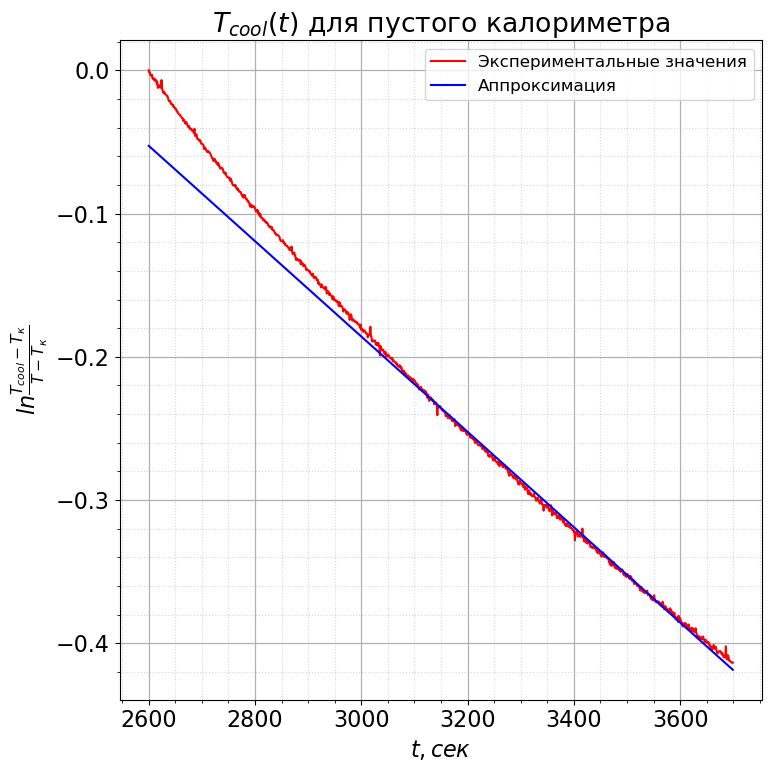

\lambda/c_1: [0.0003327735590650755, 1.990924621946237e-05]
t_heat_room_1: 1368
T_heat_room: 298.477333
k: (4.118802594817996 +- 0.0013903810254185028)
b: (298.54870991771736 +- 0.0016122529472739147)


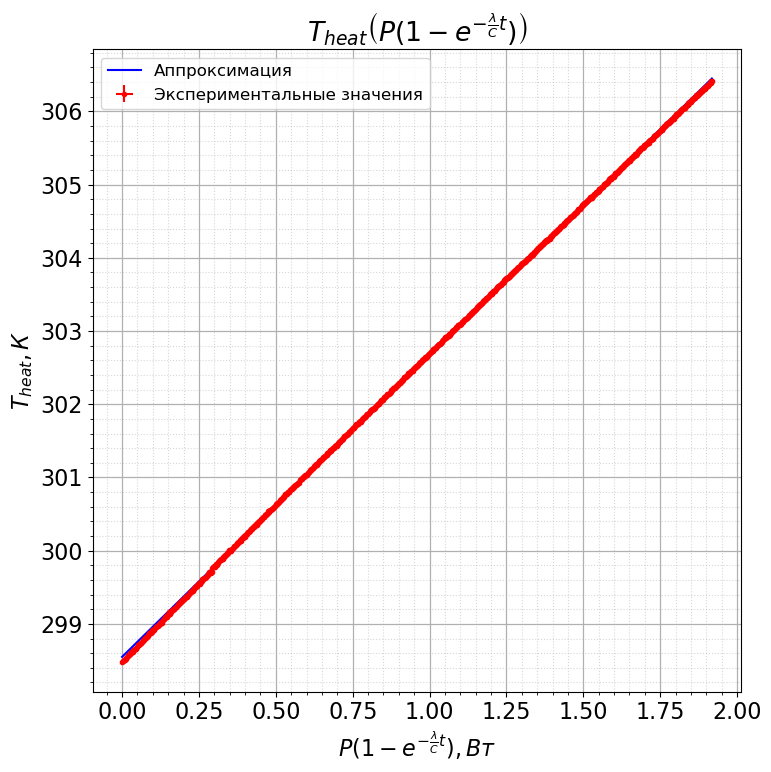

lambda_1:  [0.24278900893627034, 0.01952936563905134]
C_1: [729.592247708574, 73.14002153547275]


In [49]:
T_cool_1 = T_cal[t_cool_1[0]:t_cool_1[1]]
T_room_1 = np.mean(T_room[t_cool_1[0]:t_cool_1[1]])

T_1 = T_cool_1[0]

x = range(t_cool_1[0], t_cool_1[1], 1)
y = [np.log((i - T_room_1) / (T_1 - T_room_1)) for i in T_cool_1]

k_cool_1, b_cool_1 = make_cool_mnk(x, y, r"$T_{cool}(t)$ для пустого калориметра", 3000 - t_cool_1[0], "graph_cool_1")

lambda_div_c_1 = [-k_cool_1[0], 0]

t = len(x) / 2
T_cool_mean = np.mean(T_cool_1)
T_beg = T_1
lambda_div_c = lambda_div_c_1
k_cool = k_cool_1
T_room_ = T_room_1
lambda_div_c_1[1] = np.sqrt((1 / t * lambda_div_c[0])**2 * 0.01**2 + (1 / t * 1 / (T_cool_mean - T_room_))**2 * 0.05**2 + (1 / t * (T_cool_mean - T_beg) / ((T_cool_mean - T_room_) * (T_beg - T_room_)))**2 * 0.1**2 + (1 / t / (T_beg - T_room_))**2 * 0.05**2 + k_cool[1]**2)
print(r"\lambda/c_1:", lambda_div_c_1)

t_heat_room_1 = 0
cur_T = 0
for i in range(t_heat_1[0], t_heat_1[1]):
    if np.abs(cur_T - T_room[i]) > np.abs(T_cal[i] - T_room[i]):
        cur_T = T_cal[i]
        t_heat_room_1 = i

print("t_heat_room_1:", t_heat_room_1)
print("T_heat_room:", T_room[t_heat_room_1])

x = [P[0] * (1 - np.exp(-lambda_div_c_1[0] * t_)) for t_ in range(0, t_heat_1[1] - t_heat_room_1, 1)]
T_heat_1 = T_cal[t_heat_room_1:t_heat_1[1]]
y = T_heat_1

k_heat_1, b_heat_1 = make_mnk("img/graph_heat_1.png", r"$T_{heat}\left(P(1 - e^{- \frac{\lambda}{C} t})\right)$", r"$P(1 - e^{- \frac{\lambda}{C} t}), Вт$", r"$T_{heat}, К$", x, y, 0, 0)


lambda_1 = [1 / k_heat_1[0], 0]
T_heat_mean = np.mean(T_heat_1)
lambda_div_c = lambda_div_c_1
lambda_ = lambda_1
lambda_1[1] = np.sqrt((lambda_[0] / P[0])**2 * P[1]**2 + ((P[0] * t * np.exp(-lambda_div_c[0] * t)) / (T_heat_mean - T_room_))**2 * lambda_div_c[1]**2 + ((P[0] * lambda_div_c[0] * np.exp(-lambda_div_c[0] * t)) / (T_heat_mean - T_room_))**2 * 0.01**2 + (lambda_[0] / (T_heat_mean - T_room_))**2 * (0.1**2 + 0.05**2) + lambda_[1]**2)

print("lambda_1: ", lambda_1)

lambda_ = lambda_1
C_1 = [lambda_[0] / lambda_div_c[0], 0]
C_1[1] = C_1[0] * np.sqrt((lambda_[1] / lambda_[0])**2 + (lambda_div_c[1] / lambda_div_c[0])**2)

print("C_1:", C_1)

k: (-0.0002156036027096469 +- 3.958582260101676e-07)
b: (1.3505029824377686 +- 0.0026524460688468095)


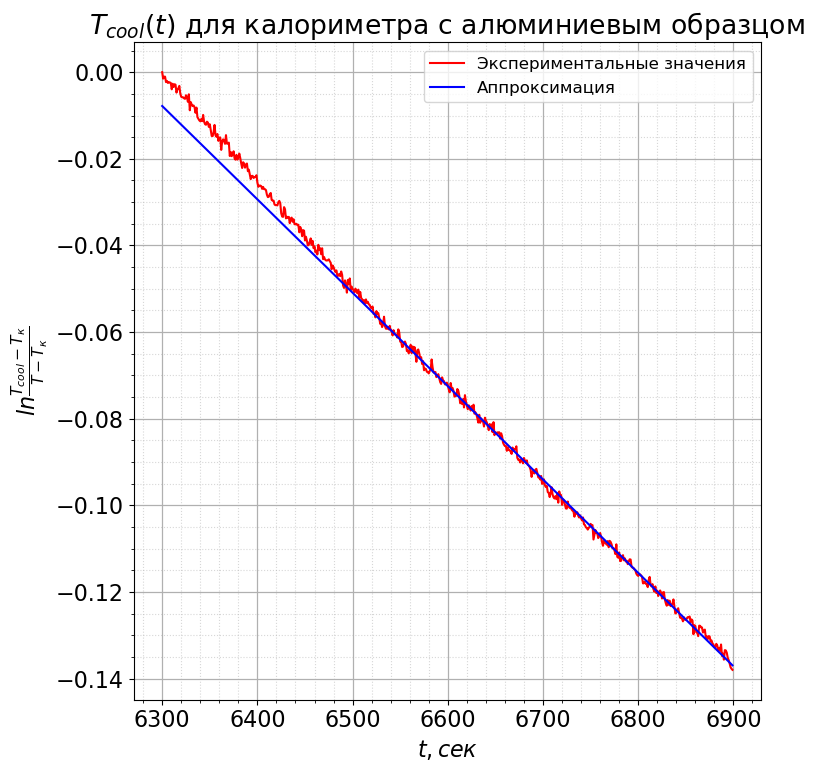

\lambda/c_2: [0.0002156036027096469, 3.9366284623572306e-05]
t_heat_room_2: 4879
T_heat_room: 299.2079105
k: (4.858575610379407 +- 0.0020621462150900906)
b: (299.27618421750753 +- 0.001609321213183717)


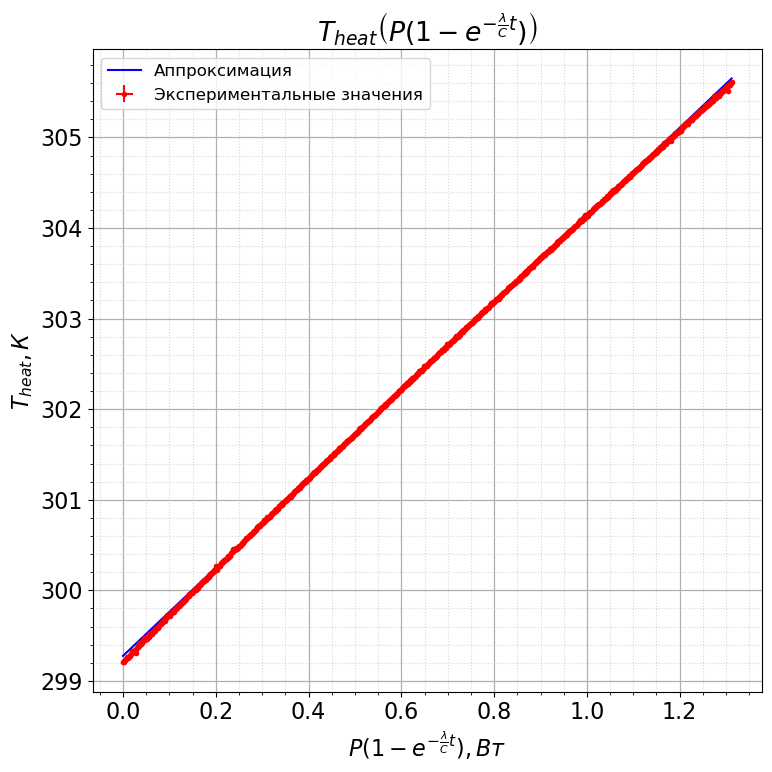

lambda_2:  [0.20582163996042246, 0.03770442908319723]
C_2: [954.6298734052334, 246.908519391656]
C_alum: [225.03762569665946, 257.51364953801806]
c_alum: [765.1738377989102, 875.5999107165223]


In [50]:
T_cool_2 = T_cal[t_cool_2[0]:t_cool_2[1]]
T_room_2 = np.mean(T_room[t_cool_2[0]:t_cool_2[1]])

T_2 = T_cool_2[0]

x = range(t_cool_2[0], t_cool_2[1], 1)
y = [np.log((i - T_room_2) / (T_2 - T_room_2)) for i in T_cool_2]

k_cool_2, b_cool_2 = make_cool_mnk(x, y, r"$T_{cool}(t)$ для калориметра с алюминиевым образцом", 6500 - t_cool_2[0], "graph_cool_2")

lambda_div_c_2 = [-k_cool_2[0], 0]

t = len(x) / 2
T_cool_mean = np.mean(T_cool_2)
T_beg = T_2
lambda_div_c = lambda_div_c_2
k_cool = k_cool_2
T_room_ = T_room_2
lambda_div_c_2[1] = np.sqrt((1 / t * lambda_div_c[0])**2 * 0.01**2 + (1 / t * 1 / (T_cool_mean - T_room_))**2 * 0.05**2 + (1 / t * (T_cool_mean - T_beg) / ((T_cool_mean - T_room_) * (T_beg - T_room_)))**2 * 0.1**2 + (1 / t / (T_beg - T_room_))**2 * 0.05**2 + k_cool[1]**2)
print(r"\lambda/c_2:", lambda_div_c_2)

t_heat_room_2 = 0
cur_T = 0
for i in range(t_heat_2[0], t_heat_2[1]):
    if np.abs(cur_T - T_room[i]) > np.abs(T_cal[i] - T_room[i]):
        cur_T = T_cal[i]
        t_heat_room_2 = i

print("t_heat_room_2:", t_heat_room_2)
print("T_heat_room:", T_room[t_heat_room_2])

x = [P[0] * (1 - np.exp(-lambda_div_c_2[0] * t_)) for t_ in range(0, t_heat_2[1] - t_heat_room_2, 1)]
T_heat_2 = T_cal[t_heat_room_2:t_heat_2[1]]
y = T_heat_2

k_heat_2, b_heat_2 = make_mnk("img/graph_heat_2.png", r"$T_{heat}\left(P(1 - e^{- \frac{\lambda}{C} t})\right)$", r"$P(1 - e^{- \frac{\lambda}{C} t}), Вт$", r"$T_{heat}, К$", x, y, 0, 0)

t = len(T_heat_2) / 2
lambda_2 = [1 / k_heat_2[0], 0]
T_heat_mean = np.mean(T_heat_2)
lambda_div_c = lambda_div_c_2
lambda_ = lambda_2
lambda_2[1] = np.sqrt((lambda_[0] / P[0])**2 * P[1]**2 + ((P[0] * t * np.exp(-lambda_div_c[0] * t)) / (T_heat_mean - T_room_))**2 * lambda_div_c[1]**2 + ((P[0] * lambda_div_c[0] * np.exp(-lambda_div_c[0] * t)) / (T_heat_mean - T_room_))**2 * 0.01**2 + (lambda_[0] / (T_heat_mean - T_room_))**2 * (0.1**2 + 0.05**2) + lambda_[1]**2)

print("lambda_2: ", lambda_2)

lambda_ = lambda_2
C_2 = [lambda_[0] / lambda_div_c[0], 0]
C_2[1] = C_2[0] * np.sqrt((lambda_[1] / lambda_[0])**2 + (lambda_div_c[1] / lambda_div_c[0])**2)

print("C_2:", C_2)

C_alum = [C_2[0] - C_1[0], np.sqrt(C_1[1]**2 + C_2[1]**2)]

print("C_alum:", C_alum)

c_alum = [C_alum[0] / 0.2941, 0]
c_alum[1] = c_alum[0] * np.sqrt((C_alum[1] / C_alum[0])**2 + (0.5 / 294.1)**2)

print("c_alum:", c_alum)

k: (-0.0002380283797351405 +- 8.117173488851143e-07)
b: (2.0855965414736373 +- 0.007427140560835058)


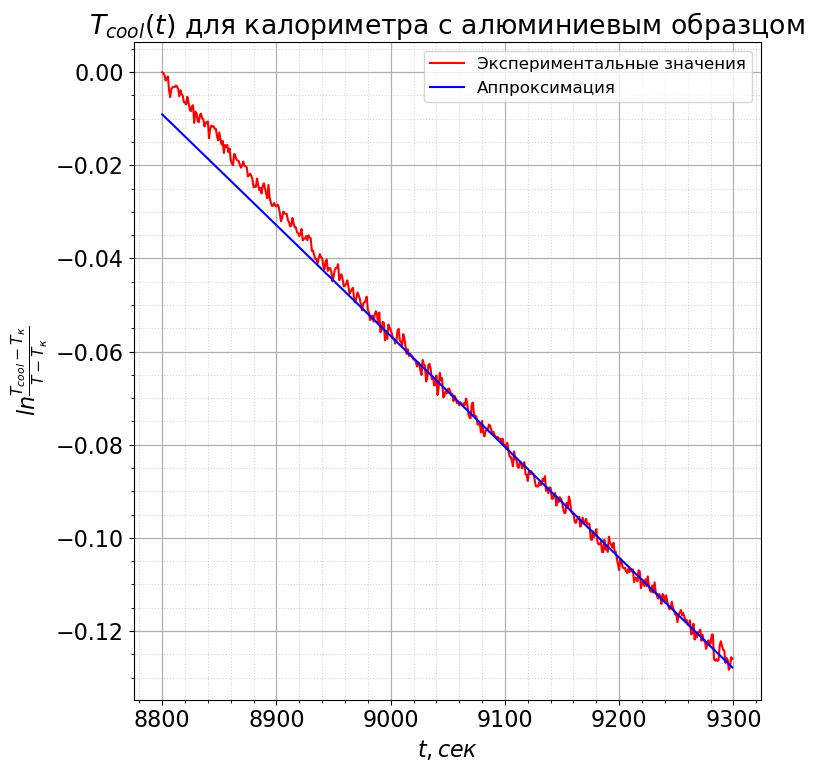

\lambda/c_3: [0.0002380283797351405, 6.334560730220104e-05]
t_heat_room_3: 7957
T_heat_room: 299.1587371
k: (5.131156791616976 +- 0.002851236611686191)
b: (299.2139265933646 +- 0.001454257399238345)


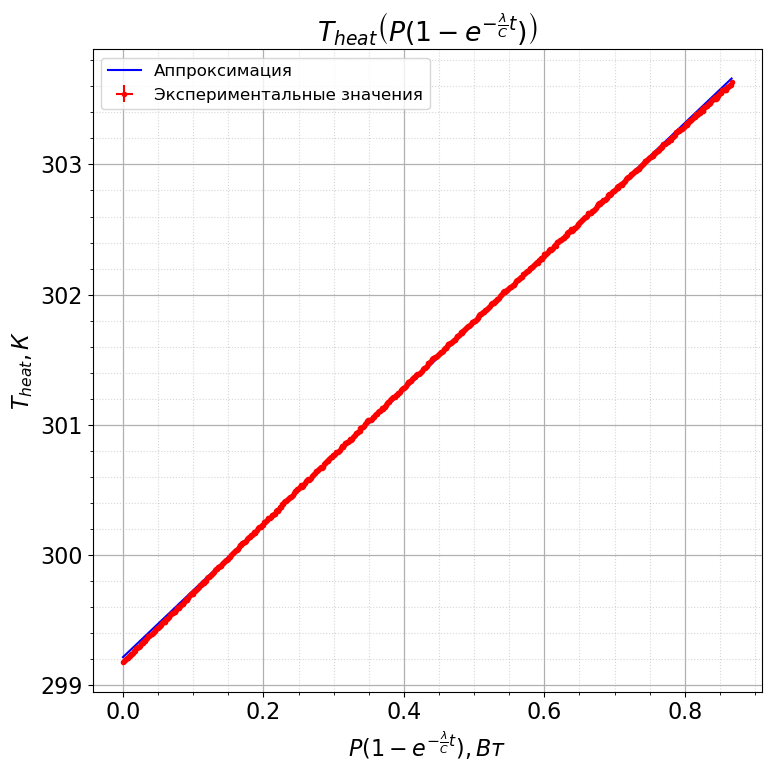

lambda_3:  [0.19488782756234407, 0.050384586155179385]
C_3: [818.7587874151818, 303.78222305288364]
C_titan: [89.16653970660786, 312.46296067399953]
c_titan: [304.1150740334511, 2681.370297491877]


In [51]:
T_cool_3 = T_cal[t_cool_3[0]:t_cool_3[1]]
T_room_3 = np.mean(T_room[t_cool_3[0]:t_cool_3[1]])

T_3 = T_cool_3[0]

x = range(t_cool_3[0], t_cool_3[1], 1)
y = [np.log((i - T_room_3) / (T_3 - T_room_3)) for i in T_cool_3]

k_cool_3, b_cool_3 = make_cool_mnk(x, y, r"$T_{cool}(t)$ для калориметра с алюминиевым образцом", 9000 - t_cool_3[0], "graph_cool_3")

lambda_div_c_3 = [-k_cool_3[0], 0]

t = len(x) / 2
T_cool_mean = np.mean(T_cool_3)
T_beg = T_3
lambda_div_c = lambda_div_c_3
k_cool = k_cool_3
T_room_ = T_room_3
lambda_div_c_3[1] = np.sqrt((1 / t * lambda_div_c[0])**2 * 0.01**2 + (1 / t * 1 / (T_cool_mean - T_room_))**2 * 0.05**2 + (1 / t * (T_cool_mean - T_beg) / ((T_cool_mean - T_room_) * (T_beg - T_room_)))**2 * 0.1**2 + (1 / t / (T_beg - T_room_))**2 * 0.05**2 + k_cool[1]**2)
print(r"\lambda/c_3:", lambda_div_c_3)

t_heat_room_3 = 0
cur_T = 0
for i in range(t_heat_3[0], t_heat_3[1]):
    if np.abs(cur_T - T_room[i]) > np.abs(T_cal[i] - T_room[i]):
        cur_T = T_cal[i]
        t_heat_room_3 = i

print("t_heat_room_3:", t_heat_room_3)
print("T_heat_room:", T_room[t_heat_room_3])

x = [P[0] * (1 - np.exp(-lambda_div_c_3[0] * t_)) for t_ in range(0, t_heat_3[1] - t_heat_room_3, 1)]
T_heat_3 = T_cal[t_heat_room_3:t_heat_3[1]]
y = T_heat_3

k_heat_3, b_heat_3 = make_mnk("img/graph_heat_3.png", r"$T_{heat}\left(P(1 - e^{- \frac{\lambda}{C} t})\right)$", r"$P(1 - e^{- \frac{\lambda}{C} t}), Вт$", r"$T_{heat}, К$", x, y, 0, 0)

t = len(T_heat_3) / 2
lambda_3 = [1 / k_heat_3[0], 0]
T_heat_mean = np.mean(T_heat_3)
lambda_div_c = lambda_div_c_3
lambda_ = lambda_3
lambda_3[1] = np.sqrt((lambda_[0] / P[0])**2 * P[1]**2 + ((P[0] * t * np.exp(-lambda_div_c[0] * t)) / (T_heat_mean - T_room_))**2 * lambda_div_c[1]**2 + ((P[0] * lambda_div_c[0] * np.exp(-lambda_div_c[0] * t)) / (T_heat_mean - T_room_))**2 * 0.01**2 + (lambda_[0] / (T_heat_mean - T_room_))**2 * (0.1**2 + 0.05**2) + lambda_[1]**2)

print("lambda_3: ", lambda_3)

lambda_ = lambda_3
C_3 = [lambda_[0] / lambda_div_c[0], 0]
C_3[1] = C_3[0] * np.sqrt((lambda_[1] / lambda_[0])**2 + (lambda_div_c[1] / lambda_div_c[0])**2)

print("C_3:", C_3)

C_titan = [C_3[0] - C_1[0], np.sqrt(C_1[1]**2 + C_3[1]**2)]

print("C_titan:", C_titan)

c_titan = [C_titan[0] / 0.2932, 0]
c_titan[1] = c_alum[0] * np.sqrt((C_titan[1] / C_titan[0])**2 + (0.5 / 293.2)**2)

print("c_titan:", c_titan)

In [93]:
print("t_heat_room_1:", t_heat_room_1)
print("T_heat_room:", T_room[t_heat_room_1])

dT_heat_1 = 0.5
dt_heat_min_1 = 0
dt_heat_max_1 = 0
for i in range(t_heat_1[0], t_heat_1[1]):
    if dt_heat_min_1 == 0 and T_cal[i] >= T_room[t_heat_room_1] - dT_heat_1 / 2:
        dt_heat_min_1 = i
    elif dt_heat_min_1 != 0 and T_cal[i] <= T_room[t_heat_room_1] + dT_heat_1 / 2:
        dt_heat_max_1 = i

def func(x, k, b):
        return x * k + b

popt, pcov = curve_fit(func, range(dt_heat_min_1, dt_heat_max_1), T_cal[dt_heat_min_1:dt_heat_max_1], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

dt_heat_1 = dt_heat_max_1 - dt_heat_min_1

dT_dt_heat_1 = [k, dk]
print("dT_dt_heat_1:", dT_dt_heat_1)

C_1_diff = [P[0] / dT_dt_heat_1[0], 0]
C_1_diff[1] = C_1_diff[0] * np.sqrt((P[1] / P[0])**2 + (0.01 / dt_heat_1)**2 + (0.1 / dT_heat_1)**2)
C_1_diff[1] = np.sqrt(C_1_diff[1]**2 + dT_dt_heat_1[1]**2)
print("C_1_diff:", C_1_diff)

t_heat_room_1: 1368
T_heat_room: 298.477333
dT_dt_heat_1: [0.008713383022987083, 4.8620514638377546e-05]
C_1_diff: [701.7930982797179, 143.80711621435873]


In [95]:
print("t_heat_2_k:", t_heat_room_2)
print("T_room:", T_room[t_heat_room_2])

dT_heat_2 = 0.5
dt_heat_min_2 = 0
dt_heat_max_2 = 0
for i in range(4500, t_heat_2[1]):
    if dt_heat_min_2 == 0 and T_cal[i] >= T_room[t_heat_room_2] - dT_heat_2 / 2:
        dt_heat_min_2 = i
    elif dt_heat_min_2 != 0 and T_cal[i] <= T_room[t_heat_room_2] + dT_heat_2 / 2:
        dt_heat_max_2 = i

popt, pcov = curve_fit(func, range(dt_heat_min_2, dt_heat_max_2), T_cal[dt_heat_min_2:dt_heat_max_2], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

dt_heat_2 = dt_heat_max_2 - dt_heat_min_2

print("dt_heat_2:", dt_heat_2)

dT_dt_heat_2 = [k, dk]
print("dT_dt_heat_2:", dT_dt_heat_2)

C_2_diff = [P[0] / dT_dt_heat_2[0], 0]
C_2_diff[1] = C_2_diff[0] * np.sqrt((P[1] / P[0])**2 + (0.01 / dt_heat_2)**2 + (0.1 / dT_heat_2)**2)
C_2_diff[1] = np.sqrt(C_2_diff[1]**2 + dT_dt_heat_2[1]**2)
print("C_2_diff:", C_2_diff)

C_alum_diff = [C_2_diff[0] - C_1_diff[0], np.sqrt(C_1_diff[1]**2 + C_2_diff[1]**2)]

print("C_alum_diff:", C_alum_diff)

c_alum_diff = [C_alum_diff[0] / 0.2941, 0]
c_alum_diff[1] = c_alum_diff[0] * np.sqrt((C_alum_diff[1] / C_alum_diff[0])**2 + (0.5 / 294.1)**2)

print("c_alum_diff:", c_alum_diff)

t_heat_2_k: 4879
T_room: 299.2079105
dt_heat_2: 75
dT_dt_heat_2: [0.006863132658596822, 6.284881654505543e-05]
C_2_diff: [890.9913843119883, 182.57643460410696]
C_alum_diff: [189.1982860322704, 232.41050136910297]
c_alum_diff: [643.3127712759959, 790.243876080889]


In [99]:
print("t_heat_3_k:", t_heat_room_3)
print("T_room:", T_room[t_heat_room_3])

dT_heat_3 = 0.5
dt_heat_min_3 = 0
dt_heat_max_3 = 0
for i in range(t_heat_3[0], t_heat_3[1]):
    if dt_heat_min_3 == 0 and T_cal[i] >= T_room[t_heat_room_3] - dT_heat_3 / 2:
        dt_heat_min_3 = i
    elif dt_heat_min_3 != 0 and T_cal[i] <= T_room[t_heat_room_3] + dT_heat_3 / 2:
        dt_heat_max_3 = i

popt, pcov = curve_fit(func, range(dt_heat_min_3, dt_heat_max_3), T_cal[dt_heat_min_3:dt_heat_max_3], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

dt_heat_3 = dt_heat_max_3 - dt_heat_min_3

print("dt_heat_3:", dt_heat_3)

dT_dt_heat_3 = [k, dk]
print("dT_dt_heat_3:", dT_dt_heat_3)

C_3_diff = [P[0] / dT_dt_heat_3[0], 0]
C_3_diff[1] = C_3_diff[0] * np.sqrt((P[1] / P[0])**2 + (0.01 / dt_heat_3)**2 + (0.1 / dT_heat_3)**2)
C_3_diff[1] = np.sqrt(C_3_diff[1]**2 + dT_dt_heat_3[1]**2)
print("C_3_diff:", C_3_diff)

C_titan_diff = [C_3_diff[0] - C_1_diff[0], np.sqrt(C_1_diff[1]**2 + C_3_diff[1]**2)]

print("C_titan_diff:", C_titan_diff)

c_titan_diff = [C_titan_diff[0] / 0.2941, 0]
c_titan_diff[1] = c_titan_diff[0] * np.sqrt((C_titan_diff[1] / C_titan_diff[0])**2 + (0.5 / 294.1)**2)

print("c_titan_diff:", c_titan_diff)

t_heat_3_k: 7957
T_room: 299.1587371
dt_heat_3: 62
dT_dt_heat_3: [0.007971623301189733, 3.203165494062377e-05]
C_3_diff: [767.094961359672, 157.18836259294616]
C_titan_diff: [65.30186307995405, 213.04616403151124]
c_titan_diff: [222.03965685125485, 724.4005200887767]


In [94]:
t_eq_heat_min_1 = 0
t_eq_heat_max_1 = 0
t_eq_cool_min_1 = 0
t_eq_cool_max_1 = 0

dT_heat_cool_1 = 0.5

cur_T = 0
for i in range(t_heat_1[0], t_heat_1[1]):
    if np.abs(cur_T - (304.5 - dT_heat_cool_1 / 2)) > np.abs(T_cal[i] - (304.5 - dT_heat_cool_1 / 2)):
        cur_T = T_cal[i]
        t_eq_heat_min_1 = i

cur_T = 0
for i in range(t_heat_1[0], t_heat_1[1]):
    if np.abs(cur_T - (304.5 + dT_heat_cool_1 / 2)) > np.abs(T_cal[i] - (304.5 + dT_heat_cool_1 / 2)):
        cur_T = T_cal[i]
        t_eq_heat_max_1 = i

cur_T = 0
for i in range(t_cool_1[0], t_cool_1[1]):
    if np.abs(cur_T - (304.5 - dT_heat_cool_1 / 2)) > np.abs(T_cal[i] - (304.5 - dT_heat_cool_1 / 2)):
        cur_T = T_cal[i]
        t_eq_cool_max_1 = i

cur_T = 0
for i in range(t_cool_1[0], t_cool_1[1]):
    if np.abs(cur_T - (304.5 + dT_heat_cool_1 / 2)) > np.abs(T_cal[i] - (304.5 + dT_heat_cool_1 / 2)):
        cur_T = T_cal[i]
        t_eq_cool_min_1 = i

popt, pcov = curve_fit(func, range(t_eq_heat_min_1, t_eq_heat_max_1), T_cal[t_eq_heat_min_1:t_eq_heat_max_1], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

A_1 = k

popt, pcov = curve_fit(func, range(t_eq_cool_min_1, t_eq_cool_max_1), T_cal[t_eq_cool_min_1:t_eq_cool_max_1], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

B_1 = k

C_eq_1 = [P[0] / (A_1 - B_1 + A_1 * (np.mean(T_room[t_eq_heat_min_1:t_eq_heat_max_1]) - np.mean(T_room[t_eq_cool_min_1:t_eq_cool_max_1])) / (np.mean(T_cal[t_eq_heat_min_1:t_eq_heat_max_1]) - np.mean(T_room[t_eq_heat_min_1:t_eq_heat_max_1]))), 0]
C_eq_1[1] = C_eq_1[0] * np.sqrt((P[1] / P[0])**2 + (0.1 / dT_heat_cool_1)**2)

print("C_eq_1:", C_eq_1)

C_eq_1: [764.9624236493122, 156.75132757655942]


In [97]:
t_eq_heat_min_2 = 0
t_eq_heat_max_2 = 0
t_eq_cool_min_2 = 0
t_eq_cool_max_2 = 0

dT_heat_cool_2 = 0.5

cur_T = 0
for i in range(t_heat_2[0], t_heat_2[1]):
    if np.abs(cur_T - (305 - dT_heat_cool_2 / 2)) > np.abs(T_cal[i] - (305 - dT_heat_cool_2 / 2)):
        cur_T = T_cal[i]
        t_eq_heat_min_2 = i

cur_T = 0
for i in range(t_heat_2[0], t_heat_2[1]):
    if np.abs(cur_T - (305 + dT_heat_cool_2 / 2)) > np.abs(T_cal[i] - (305 + dT_heat_cool_2 / 2)):
        cur_T = T_cal[i]
        t_eq_heat_max_2 = i

cur_T = 0
for i in range(t_cool_2[0], t_cool_2[1]):
    if np.abs(cur_T - (305 - dT_heat_cool_2 / 2)) > np.abs(T_cal[i] - (305 - dT_heat_cool_2 / 2)):
        cur_T = T_cal[i]
        t_eq_cool_max_2 = i

cur_T = 0
for i in range(t_cool_2[0], t_cool_2[1]):
    if np.abs(cur_T - (305 + dT_heat_cool_2 / 2)) > np.abs(T_cal[i] - (305 + dT_heat_cool_2 / 2)):
        cur_T = T_cal[i]
        t_eq_cool_min_2 = i

popt, pcov = curve_fit(func, range(t_eq_heat_min_2, t_eq_heat_max_2), T_cal[t_eq_heat_min_2:t_eq_heat_max_2], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

A_2 = k

popt, pcov = curve_fit(func, range(t_eq_cool_min_2, t_eq_cool_max_2), T_cal[t_eq_cool_min_2:t_eq_cool_max_2], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

B_2 = k

C_eq_2 = [P[0] / (A_2 - B_2 + A_2 * (np.mean(T_room[t_eq_heat_min_2:t_eq_heat_max_2]) - np.mean(T_room[t_eq_cool_min_2:t_eq_cool_max_2])) / (np.mean(T_cal[t_eq_heat_min_2:t_eq_heat_max_2]) - np.mean(T_room[t_eq_heat_min_2:t_eq_heat_max_2]))), 0]
C_eq_2[1] = C_eq_2[0] * np.sqrt((P[1] / P[0])**2 + (0.1 / dT_heat_cool_2)**2)

print("C_eq_2:", C_eq_2)

C_alum_eq = [C_eq_2[0] - C_eq_1[0], np.sqrt(C_eq_1[1]**2 + C_eq_2[1]**2)]

print("C_alum_diff:", C_alum_diff)

c_alum_eq = [C_alum_eq[0] / 0.2941, 0]
c_alum_eq[1] = c_alum_eq[0] * np.sqrt((C_alum_eq[1] / C_alum_eq[0])**2 + (0.5 / 294.1)**2)

print("c_alum_eq:", c_alum_eq)



C_eq_2: [957.7638774301594, 196.2589986784452]
C_alum_diff: [189.1982860322704, 232.41050136910297]
c_alum_eq: [655.5642767114831, 854.0448895647893]


In [102]:
t_eq_heat_min_3 = 0
t_eq_heat_max_3 = 0
t_eq_cool_min_3 = 0
t_eq_cool_max_3 = 0

dT_heat_cool_3 = 0.5

cur_T = 0
for i in range(t_heat_3[0], t_heat_3[1]):
    if np.abs(cur_T - (303.5 - dT_heat_cool_3 / 2)) > np.abs(T_cal[i] - (303.5 - dT_heat_cool_3 / 2)):
        cur_T = T_cal[i]
        t_eq_heat_min_3 = i

cur_T = 0
for i in range(t_heat_3[0], t_heat_3[1]):
    if np.abs(cur_T - (303.5 + dT_heat_cool_3 / 2)) > np.abs(T_cal[i] - (303.5 + dT_heat_cool_3 / 2)):
        cur_T = T_cal[i]
        t_eq_heat_max_3 = i

cur_T = 0
for i in range(t_cool_3[0], t_cool_3[1]):
    if np.abs(cur_T - (303.5 - dT_heat_cool_3 / 2)) > np.abs(T_cal[i] - (303.5 - dT_heat_cool_3 / 2)):
        cur_T = T_cal[i]
        t_eq_cool_max_3 = i

cur_T = 0
for i in range(t_cool_3[0], t_cool_3[1]):
    if np.abs(cur_T - (303.5 + dT_heat_cool_3 / 2)) > np.abs(T_cal[i] - (303.5 + dT_heat_cool_3 / 2)):
        cur_T = T_cal[i]
        t_eq_cool_min_3 = i

popt, pcov = curve_fit(func, range(t_eq_heat_min_3, t_eq_heat_max_3), T_cal[t_eq_heat_min_3:t_eq_heat_max_3], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

A_3 = k

popt, pcov = curve_fit(func, range(t_eq_cool_min_3, t_eq_cool_max_3), T_cal[t_eq_cool_min_3:t_eq_cool_max_3], p0 = (0.0, 0.0))
k, b = popt
dk, db = np.sqrt(np.diag(pcov))

B_3 = k

C_eq_3 = [P[0] / (A_3 - B_3 + A_3 * (np.mean(T_room[t_eq_heat_min_3:t_eq_heat_max_3]) - np.mean(T_room[t_eq_cool_min_3:t_eq_cool_max_3])) / (np.mean(T_cal[t_eq_heat_min_3:t_eq_heat_max_3]) - np.mean(T_room[t_eq_heat_min_3:t_eq_heat_max_3]))), 0]
C_eq_3[1] = C_eq_3[0] * np.sqrt((P[1] / P[0])**2 + (0.1 / dT_heat_cool_3)**2)

print("C_eq_3:", C_eq_3)

C_titan_eq = [C_eq_3[0] - C_eq_1[0], np.sqrt(C_eq_1[1]**2 + C_eq_3[1]**2)]

print("C_titan_diff:", C_titan_diff)

c_titan_eq = [C_titan_eq[0] / 0.2941, 0]
c_titan_eq[1] = c_titan_eq[0] * np.sqrt((C_titan_eq[1] / C_titan_eq[0])**2 + (0.5 / 294.1)**2)

print("c_titan_eq:", c_titan_eq)



C_eq_3: [838.6497842279498, 171.85088180199585]
C_titan_diff: [65.30186307995405, 213.04616403151124]
c_titan_eq: [250.5520590909133, 790.8944697345498]
